This is mainly to keep track of ways to analyse networks.  
Please add interesting plots or basics that are missing. 

In [24]:
import pypsa
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

import logging
logging.getLogger().setLevel(logging.ERROR)

In [25]:
n = pypsa.Network("../data/networks/elec_s_256.nc")

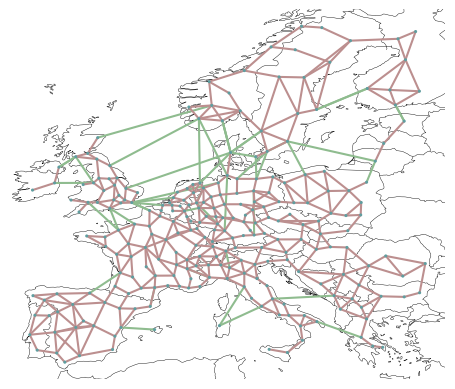

In [26]:
n.plot();

In [34]:
for c in list(n.components.values())[2:]:
    print("Component '{}' hat {} entries".format(c.name, len(c.static)))

Component 'Generator' hat 1453 entries
Component 'Load' hat 256 entries
Component 'Link' hat 49 entries
Component 'Store' hat 0 entries
Component 'StorageUnit' hat 209 entries
Component 'Line' hat 450 entries
Component 'LineType' hat 59 entries
Component 'Transformer' hat 0 entries
Component 'TransformerType' hat 14 entries
Component 'ShuntImpedance' hat 0 entries
Component 'GlobalConstraint' hat 0 entries
Component 'Shape' hat 0 entries
Component 'SubNetwork' hat 0 entries


## Static Component Data:  
Mind that time depended data is better shown differently

In [35]:
n.storage_units.head()

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_nom_set,p_min_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
AT0 0 hydro,AT0 0,PQ,,5.000000,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,453.342322,0.000000,0.900000,0.0,0.0,0.0
AT0 1 PHS,AT0 1,PQ,,1779.300000,0.0,False,0.0,inf,NaN,-1.0,...,False,NaN,True,False,293.924015,0.866025,0.866025,0.0,0.0,0.0
AT0 1 hydro,AT0 1,PQ,,3787.620000,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,544.182629,0.000000,0.900000,0.0,0.0,0.0
AT0 2 PHS,AT0 2,PQ,,2412.000000,0.0,False,0.0,inf,NaN,-1.0,...,False,NaN,True,False,4.441128,0.866025,0.866025,0.0,0.0,0.0
AT0 2 hydro,AT0 2,PQ,,1405.484076,0.0,False,0.0,inf,NaN,0.0,...,False,NaN,True,False,370.323700,0.000000,0.900000,0.0,0.0,0.0


## Time-varying component data:

<Axes: xlabel='snapshot'>

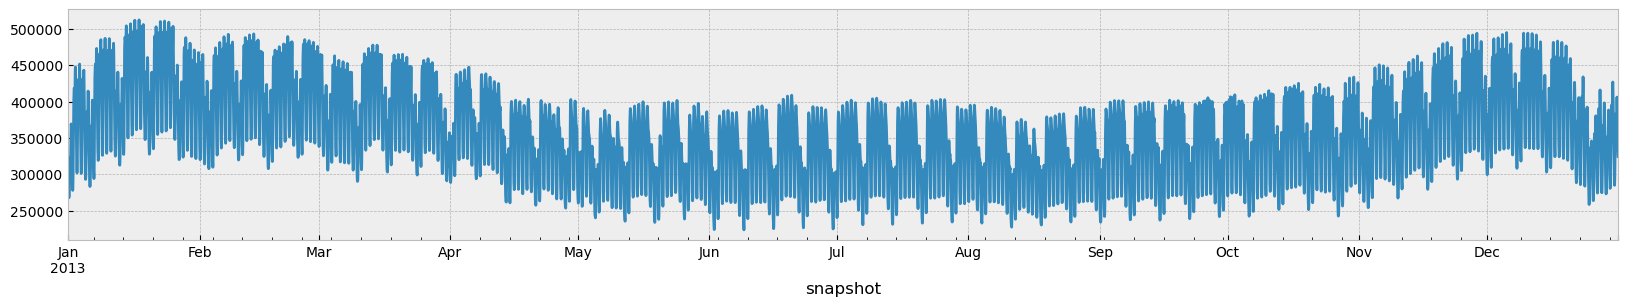

In [40]:
n.loads_t.p_set.sum(axis=1).plot(figsize=(20,3))

<Axes: xlabel='snapshot'>

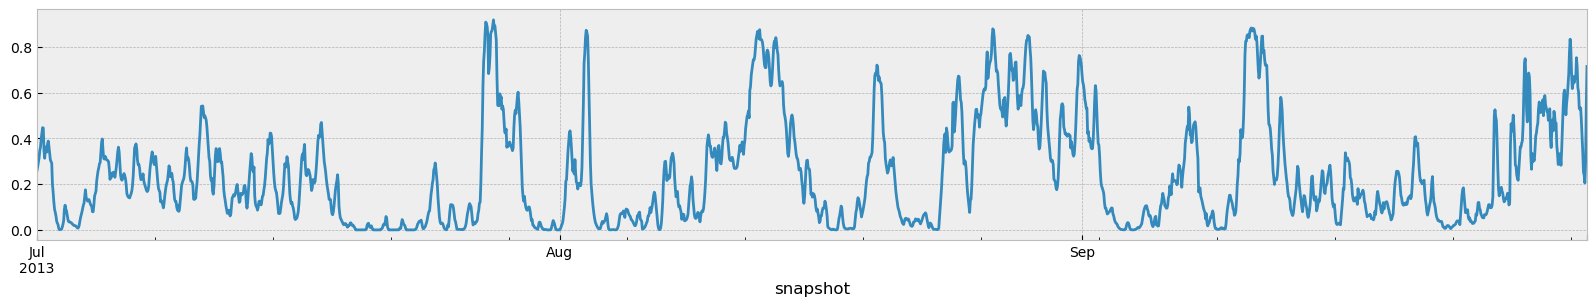

In [45]:
n.generators_t.p_max_pu.loc["2013-07":"2013-09", "ES0 0 onwind"].plot(figsize=(20,3))